In [21]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/yawn-eye-dataset-new/dataset_new/test/Closed/_163.jpg
/kaggle/input/yawn-eye-dataset-new/dataset_new/test/Closed/_330.jpg
/kaggle/input/yawn-eye-dataset-new/dataset_new/test/Closed/_498.jpg
/kaggle/input/yawn-eye-dataset-new/dataset_new/test/Closed/_167.jpg
/kaggle/input/yawn-eye-dataset-new/dataset_new/test/Closed/_76.jpg
/kaggle/input/yawn-eye-dataset-new/dataset_new/test/Closed/_439.jpg
/kaggle/input/yawn-eye-dataset-new/dataset_new/test/Closed/_226.jpg
/kaggle/input/yawn-eye-dataset-new/dataset_new/test/Closed/_168.jpg
/kaggle/input/yawn-eye-dataset-new/dataset_new/test/Closed/_96.jpg
/kaggle/input/yawn-eye-dataset-new/dataset_new/test/Closed/_64.jpg
/kaggle/input/yawn-eye-dataset-new/dataset_new/test/Closed/_373.jpg
/kaggle/input/yawn-eye-dataset-new/dataset_new/test/Closed/_115.jpg
/kaggle/input/yawn-eye-dataset-new/dataset_new/test/Closed/_20.jpg
/kaggle/input/yawn-eye-dataset-new/dataset_new/test/Closed/_559.jpg
/kaggle/input/yawn-eye-dataset-new/dataset_new/test/

In [22]:
import numpy as np 
import pandas as pd 
import os
import cv2

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

In [23]:
batch_size = 40
img_height = 256
img_width = 256

In [24]:
## loading training data
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/kaggle/input/yawn-eye-dataset-new/dataset_new/train',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

## loading testing data
testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
'/kaggle/input/yawn-eye-dataset-new/dataset_new/test',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

Found 2467 files belonging to 4 classes.
Found 433 files belonging to 4 classes.


In [25]:
class_names = training_ds.class_names
print(class_names)

['Closed', 'Open', 'no_yawn', 'yawn']


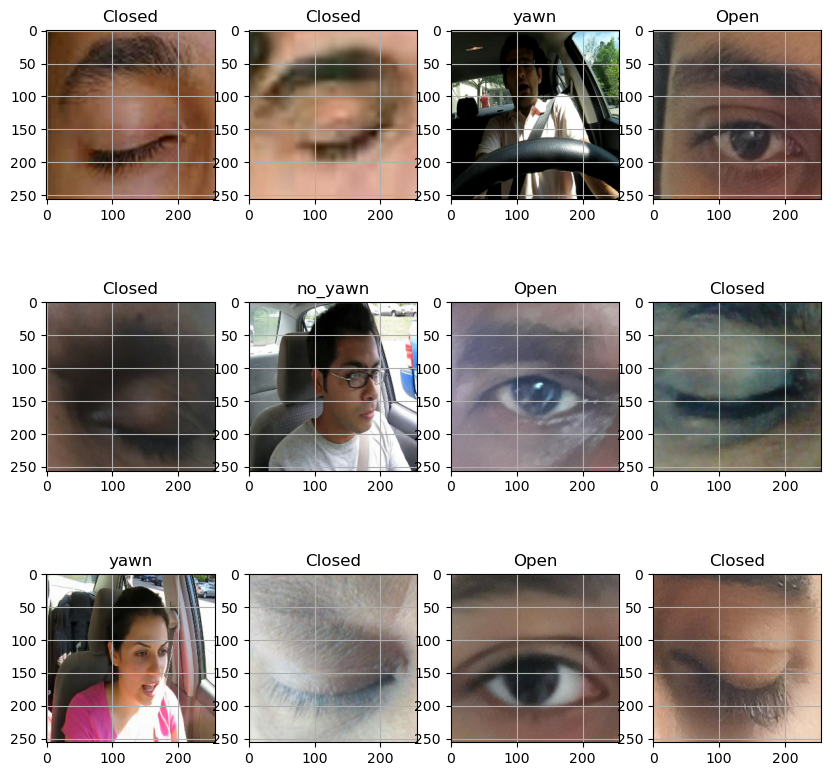

In [26]:
plt.figure(figsize=(10, 10))
for images, labels in training_ds.take(1):
  for i in range(12):
    ax = plt.subplot(3,4 , i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.grid(True)

In [27]:
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential(
  [
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.ReLU(max_value=None, negative_slope=0.0, threshold=0.0),
    layers.RandomFlip("horizontal",input_shape=(img_height,img_width,3))
  ]
)

In [28]:
pip install git+https://github.com/qubvel/segmentation_models

  Cloning https://github.com/qubvel/segmentation_models to /tmp/pip-req-build-nzpml2n_
  Running command git clone --filter=blob:none --quiet https://github.com/qubvel/segmentation_models /tmp/pip-req-build-nzpml2n_
  Resolved https://github.com/qubvel/segmentation_models to commit e951c6747f75fa9e7240816d1c79dd2e66813123
  Running command git submodule update --init --recursive -q
  Preparing metadata (setup.py) ... done
Note: you may need to restart the kernel to use updated packages.


In [29]:
from keras import applications

In [51]:
from tensorflow.keras.applications.vgg19 import VGG19

In [31]:
from tensorflow.keras.optimizers import Adam

In [32]:
from keras.applications.mobilenet_v2 import MobileNetV2

In [33]:
from tensorflow.keras.applications import ResNet152V2

In [ ]:
import efficientnet.tfkeras as efn
model = tf.keras.Sequential([data_augmentation,
      layers.Rescaling(1./255),
                             #efn.EfficientNetB3(input_shape=(256, 256, 3),
                             #                       weights='imagenet',
                             #                       include_top=False),
                             
                             applications.InceptionV3(weights='imagenet', 
                                include_top=False, 
                                input_shape=(256, 256, 3)),
                             
                            #tf.keras.applications.xception.Xception(include_top=False, weights='imagenet', input_shape=(256,256,3)),
                            #ResNet152V2(include_top=False, weights='imagenet', input_shape=(256,256,3)),
                            #VGG19(include_top=False, weights='imagenet', input_shape=(256,256,3)),
                                 layers.GlobalAveragePooling2D(),
                                 layers.Dropout(0.4),
                                 layers.BatchNormalization(),
                                 layers.Dense(64, activation='relu'),
                                 layers.BatchNormalization(),
                                 layers.Dropout(0.4),
                                 
                                 layers.Dense(4,
                                         activation='softmax')])
    
    
        
early_stopping = tf.keras.callbacks.EarlyStopping(patience=16,
                                                  monitor="val_loss",
                                                  verbose=2,
                                                  mode="auto")
checkpoint = tf.keras.callbacks.ModelCheckpoint("best.h5", 
                                                monitor="val_loss",
                                                mode="auto",
                                                verbose=2,
                                                save_best_only=True)
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])


87910968/87910968 [==============================] - 0s 0us/step


In [56]:

history = model.fit(
    training_ds,
    validation_data=testing_ds,
    epochs=64,
    callbacks=[early_stopping,checkpoint]
)

Epoch 1/64
62/62 [==============================] - ETA: 0s - loss: 0.2634 - accuracy: 0.9007
Epoch 1: val_loss improved from inf to 1.18584, saving model to best.h5
62/62 [==============================] - 70s 529ms/step - loss: 0.2634 - accuracy: 0.9007 - val_loss: 1.1858 - val_accuracy: 0.5982
Epoch 2/64
62/62 [==============================] - ETA: 0s - loss: 0.0578 - accuracy: 0.9842
Epoch 2: val_loss improved from 1.18584 to 1.14149, saving model to best.h5
62/62 [==============================] - 31s 490ms/step - loss: 0.0578 - accuracy: 0.9842 - val_loss: 1.1415 - val_accuracy: 0.7529
Epoch 3/64
62/62 [==============================] - ETA: 0s - loss: 0.0505 - accuracy: 0.9846
Epoch 3: val_loss improved from 1.14149 to 0.52108, saving model to best.h5
62/62 [==============================] - 31s 489ms/step - loss: 0.0505 - accuracy: 0.9846 - val_loss: 0.5211 - val_accuracy: 0.7852
Epoch 4/64
62/62 [==============================] - ETA: 0s - loss: 0.0322 - accuracy: 0.9919
Epoc

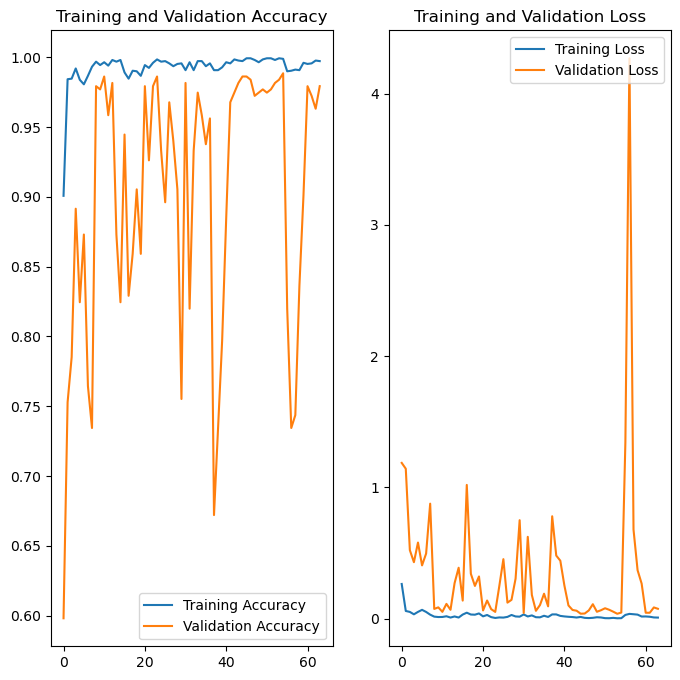

In [57]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = len(acc)

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

2/2 [==============================] - 0s 56ms/step


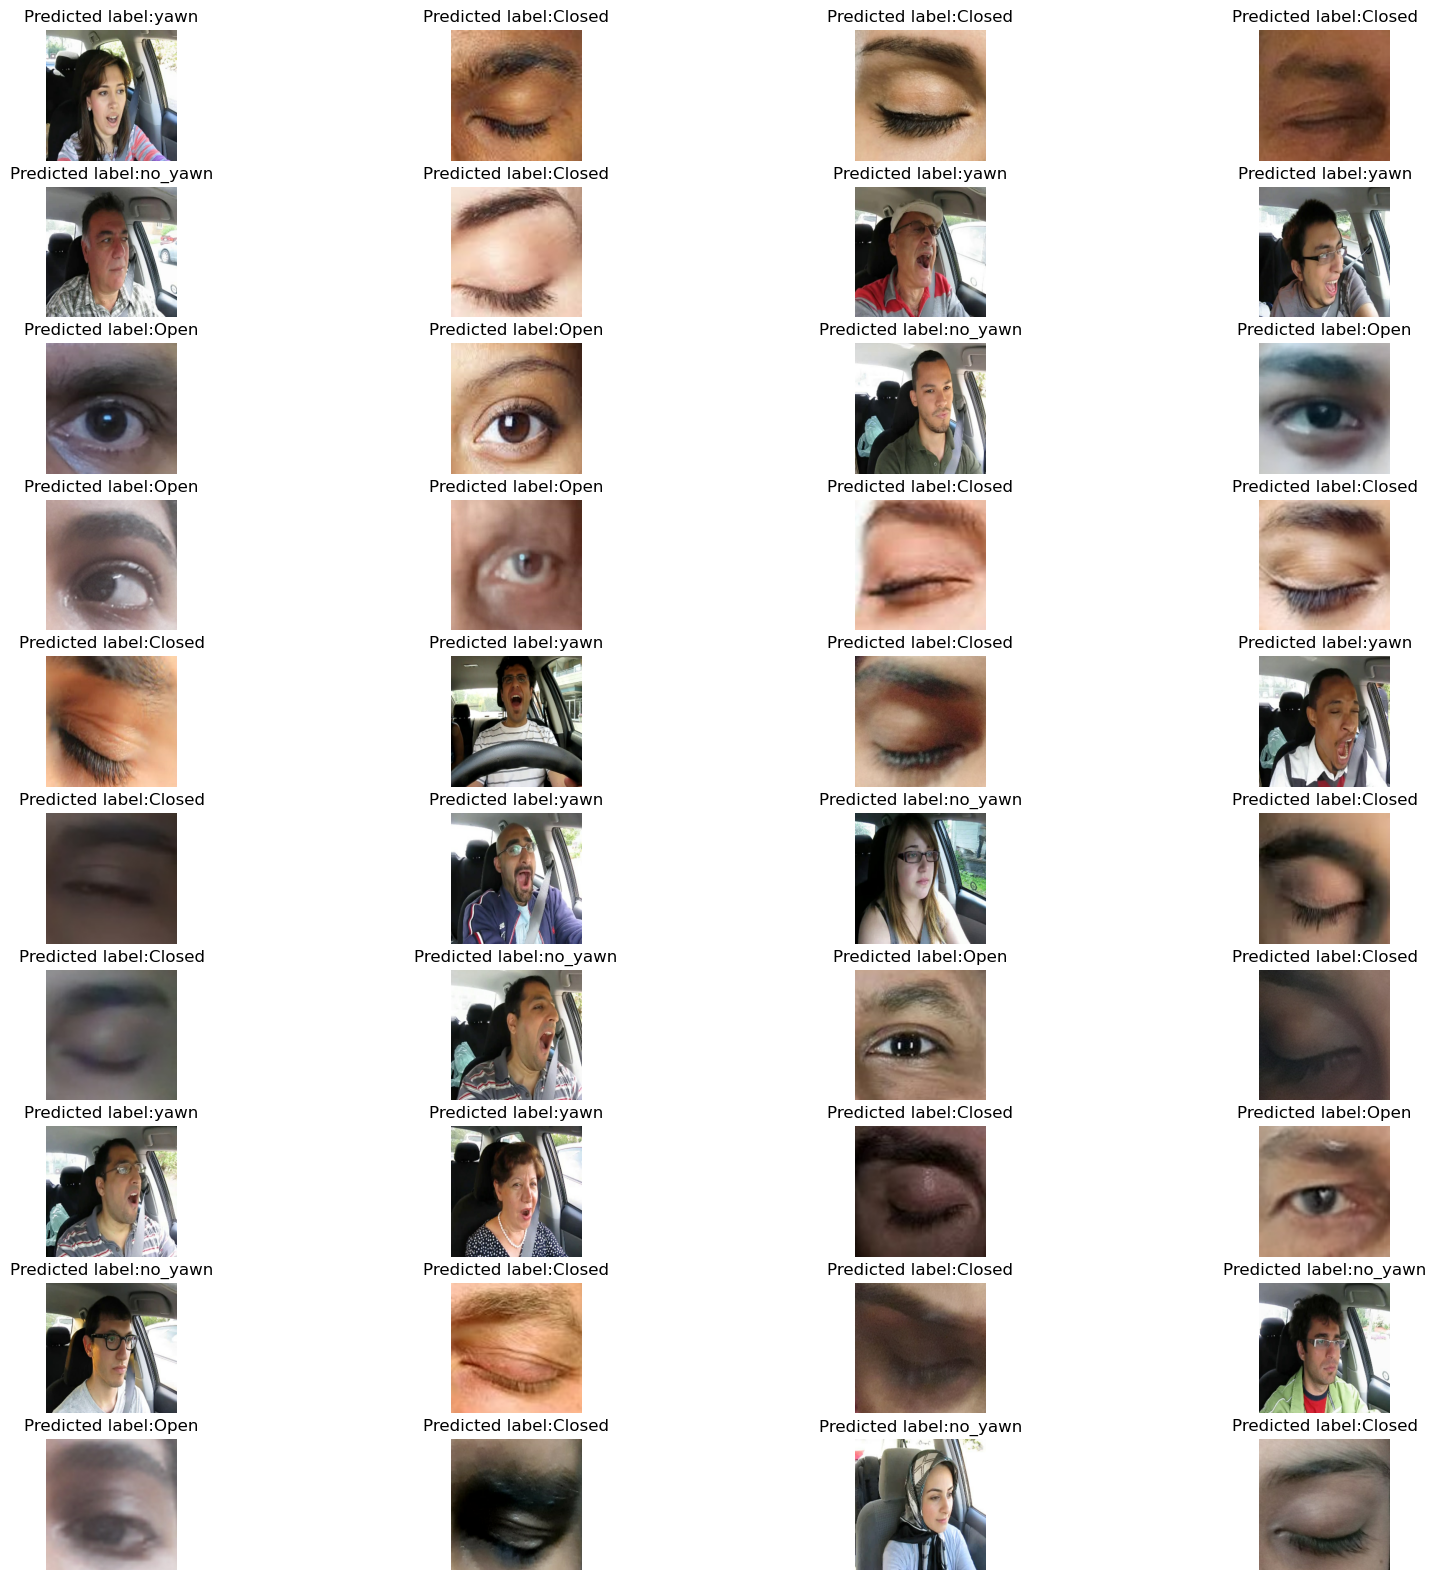

In [58]:
plt.figure(figsize=(20, 20))
for images, labels in testing_ds.take(2):
    predictions = model.predict(images)
    predlabel = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
    
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Predicted label:'+ predlabel[i])
        plt.axis('off')
        plt.grid(True)